In [1]:
import struct
import re
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Read nbytes length bytes from file.  Raises IOError on failure to read nbytes.
def _read_bytes(file, nbytes):
    s = file.read(nbytes)
    if len(s) != nbytes: raise IOError("Bytes missing from file.")
    return s

-----------
-2
1
100000.0
80 50 1 1600
0 0 0 electrostatic 100
0.5 0.5 0.5
[ 99.9594755   99.91895408  99.71634487 ... -46.55995831 -46.58871264
 -46.59779644]


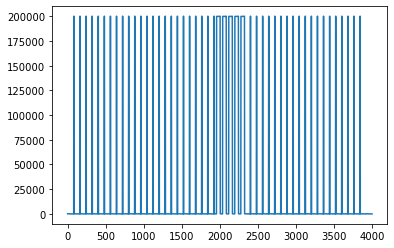

In [3]:
pathCylindrical = 'simion_test_cylindrical.pa'
pathPlanar = 'simion_test_planar_mirrored.pa'
pathPlanarScaled = 'simion_test_planar_2d_scaled.pa'

def read_pa(path):
    f = open(path, 'rb')
    print("-----------")
    (mode,) = struct.unpack("i", _read_bytes(f, 4))
    print(mode)

    (symmetry,) = struct.unpack("i", _read_bytes(f, 4))
    print(symmetry)
    
    (max_voltage,) = struct.unpack("d", _read_bytes(f, 8))
    print(max_voltage)
    
    (nx,ny,nz,raw_mirror) = struct.unpack("=iiii", _read_bytes(f, 4*4))
    print(nx, ny, nz, raw_mirror)
    
    mirror_x = raw_mirror & 1
    mirror_y = (raw_mirror >> 1) & 1
    mirror_z = (raw_mirror >> 2) & 1
    field_type = ((raw_mirror >> 3) & 1) and "magnetic" or "electrostatic"
    ng = (raw_mirror >> 4) & ((1 << 17)-1)
    
    if mode <= -2:
        (dx_mm, dy_mm, dz_mm) = struct.unpack("ddd", _read_bytes(f, 8*3))
    else:
        (dx_mm, dy_mm, dz_mm) = (1,1,1)
        
    print(mirror_x, mirror_y, mirror_z, field_type, ng)
    print(dx_mm, dy_mm, dz_mm)
    
    fx = "d" * nx
    num_points = nx * ny * nz
    points = [0] * num_points # allocate
    for n in range(0, num_points, nx):
        buf = f.read(nx * 8)
        points[n:n+nx] = list(struct.unpack(fx, buf))
        
        
    pts = np.array(points)
    
    print(pts)
    plt.plot(pts)
    

read_pa(pathPlanarScaled)
#print_pa(pathPlanar)

In [29]:
ng = 100
mx = 1
my = 2 
mz = 4
magnetic= 8
mirror = (mx | my | mz | magnetic) 
print('mirror  ', format(mirror,'b'))
mirror2 = (mx | my | mz |magnetic) + (ng<<4)
print('mirror2 ', format(mirror2,'b'))


print('ng      ', format(ng,'b'))
print('ng<<4   ', format(ng << 4,'b'))



mirror   1111
mirror2  11001001111
ng       1100100
ng<<4    11001000000


In [4]:
a = {'a':10, 'b':20}
print(a)

{'a': 10, 'b': 20}
